<br>

<br>

# `1st Class Summary:`

- #1: Introductory Talk
- #2: Descriptive  VS Inferential Statistics
- #3: Population VS Sample
- #4: Measure of Central Tendency
- #5: Measure of Dispertion/Variation/Variability
- #6: Quantiles
- #7: 5 Number Summary And BoxPlot

<br>
<br>

# `Today's Class Topic:`

- #1: Scatter Plot
- #2: Effect Of outliers On ML Model
- #3: Effect of Standard Deviation On ML Model. 
- #4: Correlation
- #5: Frequency and Cumulative Frequency 
- #6: Univariate Analysis 

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)


<br>

# `#01: Scatter Plot:`

<br>

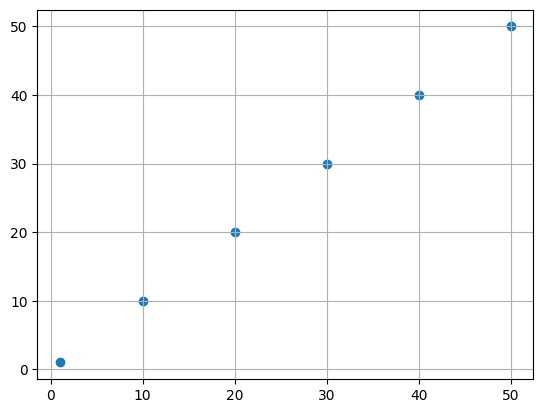

In [2]:

scatter_x = [1,10,20,30,40,50]
scatter_y = [1,10,20,30,40,50]

plt.grid()
plt.scatter(scatter_x,scatter_y)
plt.show()

<br>
<br>

# `#02: Effect of Outliers:`

<br>
<br>

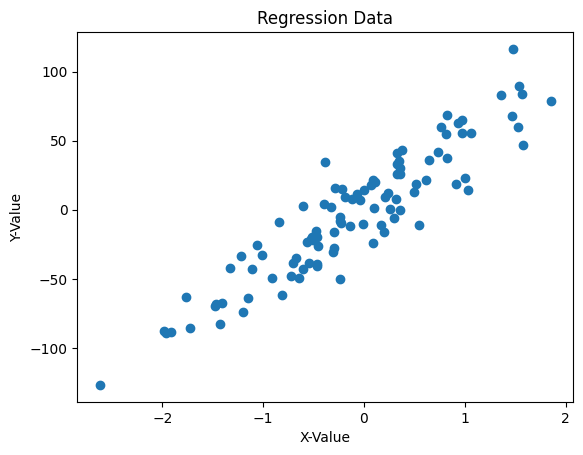

In [3]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100,
                      n_features=1,
                      random_state=42,
                      noise=20)

plt.scatter(X,y)
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.title("Regression Data")
plt.show()


<Axes: >

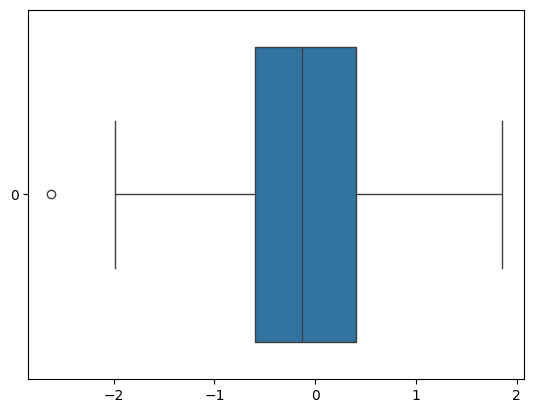

In [4]:
import seaborn as sns 
sns.boxplot(X,orient="h")

-2.1111922542592256


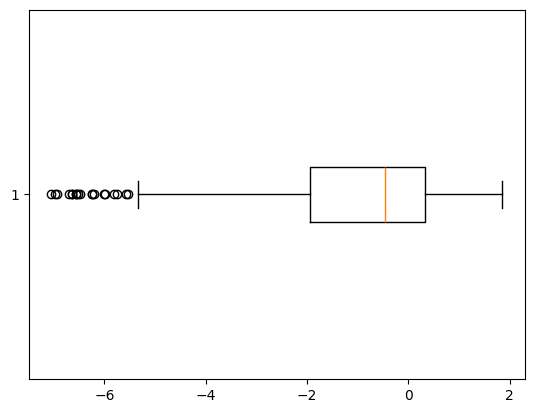

In [5]:

Q1 = np.percentile(X,25)
Q3 = np.percentile(X,75)
IQR = (Q3-Q1)
min = Q1 - 1.5*IQR
print(min)
outliers_x = np.random.uniform(min-5,min-2,30).reshape(30,1)
X_outliers = np.concatenate((X,outliers_x),axis=0)
plt.boxplot(X_outliers,orientation="horizontal")
plt.show()

In [6]:

y_ = np.random.uniform(0,50,30)
y_new = np.concatenate((y,y_),axis=0)

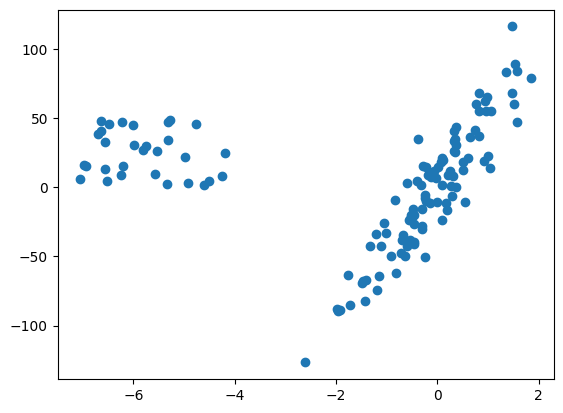

In [7]:
plt.scatter(X_outliers,y_new)
plt.show()

In [8]:

#<---------------- Without Outliers(Linear Regression Solved With GD):---------------------->
# GD--> Gradient Descent algorithrm:
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=42)

model_normal = SGDRegressor()
model_normal.fit(X_train,y_train)
y_pred = model_normal.predict(X_test)
r2_score(y_test,y_pred) * 100 

80.92229840393031

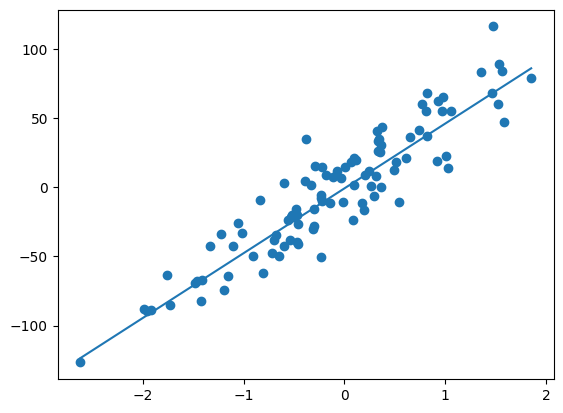

In [9]:

# without outliers:
x_draw = np.linspace(X_train.min(),X_train.max(),100)
y_draw = model_normal.intercept_ + (model_normal.coef_*x_draw)

plt.plot(x_draw,y_draw)
plt.scatter(X,y)
plt.show()

In [10]:

# <------------------Model With outliers(Linear Regression Solved With SGD):----------------->
X_train,X_test,y_train,y_test = train_test_split(X_outliers,y_new,test_size=30,random_state=42)
model_outliers = SGDRegressor()
model_outliers.fit(X_train,y_train)
y_pred = model_outliers.predict(X_test)
r2_score(y_test,y_pred) * 100 


-7.175704527578963

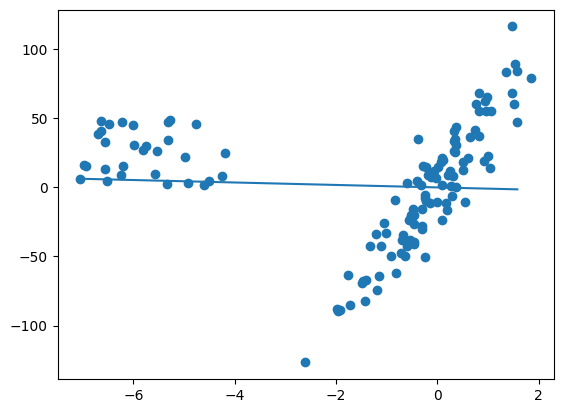

In [11]:
x_draw = np.linspace(X_train.min(),X_train.max(),100)
y_draw = model_outliers.intercept_ + (model_outliers.coef_*x_draw)

plt.plot(x_draw,y_draw)
plt.scatter(X_outliers,y_new)
plt.show()

In [12]:


#<------------- Without Outliers(Random Forest Tree Algorithrm based of if-else):------------------->
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=42)
model_rf = RandomForestRegressor(n_estimators=100,random_state=42,criterion="absolute_error")
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
r2_score(y_test,y_pred) * 100 


75.50479991154492

In [13]:


#<---------------- Without Outliers(Decision Tree Algorithrm based of if-else):---------------------->
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X_outliers,y_new,test_size=30,random_state=42)
model_normal = RandomForestRegressor(n_estimators=100,random_state=42,criterion="absolute_error")
model_normal.fit(X_train,y_train)
y_pred = model_normal.predict(X_test)
r2_score(y_test,y_pred) * 100 


82.53322970849285


### Learning:
- Effect of outliers in ML and DL.
- Outliers is good or bad it depends on the Machine Learning Algorithrm we use.
- If we use Gradient Descent Algorithrm then it prone to outliers.
- If we use Tree based Algorithrm then it is not prone to outliers.

**Gradient Descent use in Deep Learning.**


<br>
<br>

# `#03: Effect of Standard Deviation:`

<br>
<br>

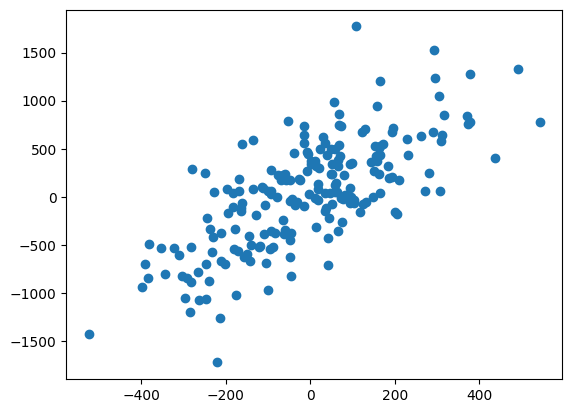

In [14]:

np.random.seed(42)
X = np.random.normal(loc=0,scale=200,size=200)

# equation: y = 2*X+10 + noise
noise = np.random.normal(loc=4,scale=400,size=200)
y = 2*X + 10 + noise
plt.scatter(X,y)
plt.show()

In [15]:

# <-----------------------SGDRegressor with high Standard Deviation--------->
X_train,X_test,y_train,y_test = train_test_split(X.reshape(-1,1),y,test_size=30,random_state=42)

model_normal = SGDRegressor()
model_normal.fit(X_train,y_train)
y_pred = model_normal.predict(X_test)
r2_score(y_test,y_pred) * 100 

-7.776182460830625e+21

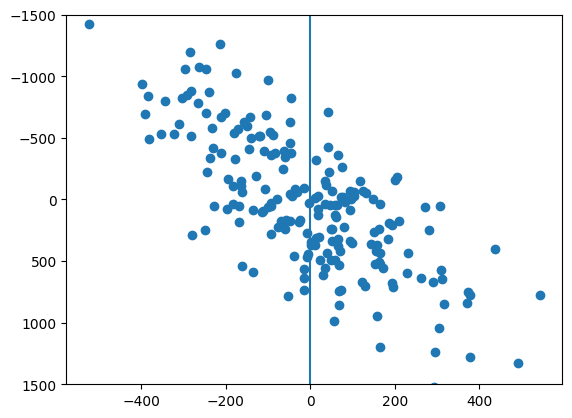

In [16]:
# without outliers:
x_draw = np.linspace(X_train.min(),X_train.max(),100)
y_draw = model_normal.intercept_ + (model_normal.coef_*x_draw)

plt.plot(x_draw,y_draw)
plt.scatter(X,y)
plt.ylim(1500,-1500)
plt.show()

In [17]:

# <-----------------------RandomForest with high Standard Deviation--------->
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,
                                 random_state=42,
                                 criterion="squared_error")
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
r2_score(y_test,y_pred) * 100 


34.27585403142105

In [18]:

# reduce the high standard deviation:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(X_train)


In [19]:

scale_X_train = ss.fit_transform(X_train)
scale_y_train = ss.fit_transform(y_train.reshape(-1,1))
scale_X_test = ss.fit_transform(X_test)
scale_y_test = ss.fit_transform(y_test.reshape(-1,1))

print(f"Before: {X_train.std()}  After: {scale_X_train.std()}")
print(f"Before: {y_train.std()}  After: {scale_y_train.std()}")
print(f"Before: {X_test.std()}  After: {scale_X_test.std()}")
print(f"Before: {y_test.std()}  After: {scale_y_test.std()}")

Before: 186.5383487341581  After: 0.9999999999999998
Before: 573.9123078275626  After: 0.9999999999999998
Before: 181.06221687312132  After: 0.9999999999999998
Before: 521.5259079158777  After: 0.9999999999999999


In [20]:

# <-----------------------SGDRegressor with low Standard Deviation--------->
model_normal = SGDRegressor()
model_normal.fit(scale_X_train,scale_y_train)
y_pred = model_normal.predict(scale_X_test)
r2_score(scale_y_test,y_pred) * 100 


/home/yasin/all_program/Statistics-/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.233046398073306


### Learning:

- Effect of Standard Deviation in ML and DL.
- Std is good or bad it depends on the Machine Learning Algorithrm we use.
- High Std is bad for GD Algorithrm But low Std is good for GD Algorithrm.
- Std Doesn't metter in Tree Based Algorithrm.

**GD-> Gradient Descent use in Deep Learning.**



<br>
<br>

# `#04: Correlation:`

<br>

- Correlation measures the strength and direction of the linear relationship between two variables.
- Correlation coefficient ranging from -1 to +1
- A positive value  indicates they are most likely simillar.
- A negetive value  indicates they are not most likely simillar.

<br>

In [21]:

x_cor = [1,2,3,4,5,6,7,8,9,10]
y_cor = x_cor 
y_cor

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

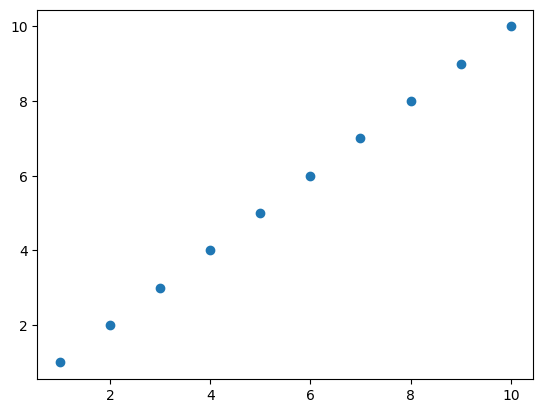

In [22]:
plt.scatter(x_cor,y_cor)

In [23]:
data = {"X_cor":x_cor,"Y_cor":y_cor}
df_lin = pd.DataFrame(data=data)
df_lin

,X_cor,Y_cor
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [24]:
df_lin.corr()

,X_cor,Y_cor
X_cor,1.0,1.0
Y_cor,1.0,1.0


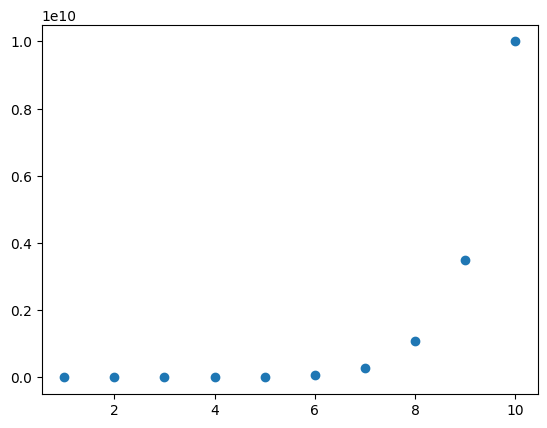

,X_cor,Y_cor
X_cor,1.000000,0.695771
Y_cor,0.695771,1.000000


In [25]:

x_cor = [1,2,3,4,5,6,7,8,9,10]
y_cor = np.pow(x_cor,10)
plt.scatter(x_cor,y_cor)
plt.show()
data = {"X_cor":x_cor,"Y_cor":y_cor}
df_lin = pd.DataFrame(data=data)
df_lin.corr()


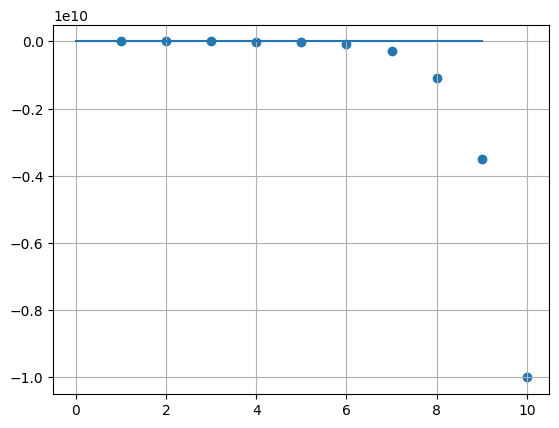

,X_cor,Y_cor
X_cor,1.000000,-0.695771
Y_cor,-0.695771,1.000000


In [26]:

x_cor = [1,2,3,4,5,6,7,8,9,10]
y_cor = - np.pow(x_cor,10)

plt.plot(x_cor)
plt.scatter(x_cor,y_cor)
plt.grid()
plt.show()

data = {"X_cor":x_cor,"Y_cor":y_cor}
df_lin = pd.DataFrame(data=data)
df_lin.corr()


<Axes: >

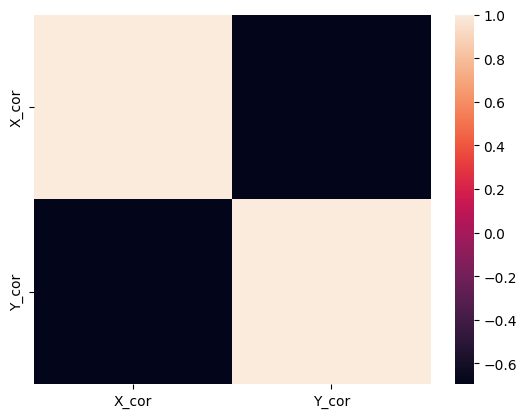

In [27]:
sns.heatmap(df_lin.corr())


### Tips Dataset:

- **total_bill:** The total amount of the bill.
- **tip:** The amount of tip received.
- **sex:** Gender of the person paying the bill.
- **smoker:** Whether the party included smokers.
- **day:** Day of the week.
- **time:** Time of day (Lunch or Dinner).
- **size:** Size of the party(Number of People).


In [28]:

tips = sns.load_dataset("tips")
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [29]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [30]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [31]:
import pandas as pd 
numerical_col = tips.select_dtypes(include=["float64","int64"])
numerical_col

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [32]:
numerical_col.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

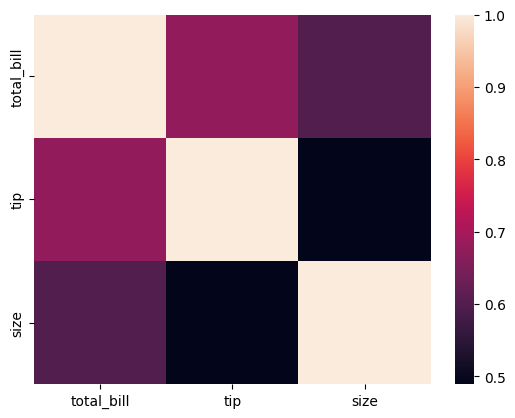

In [33]:

sns.heatmap(numerical_col.corr())

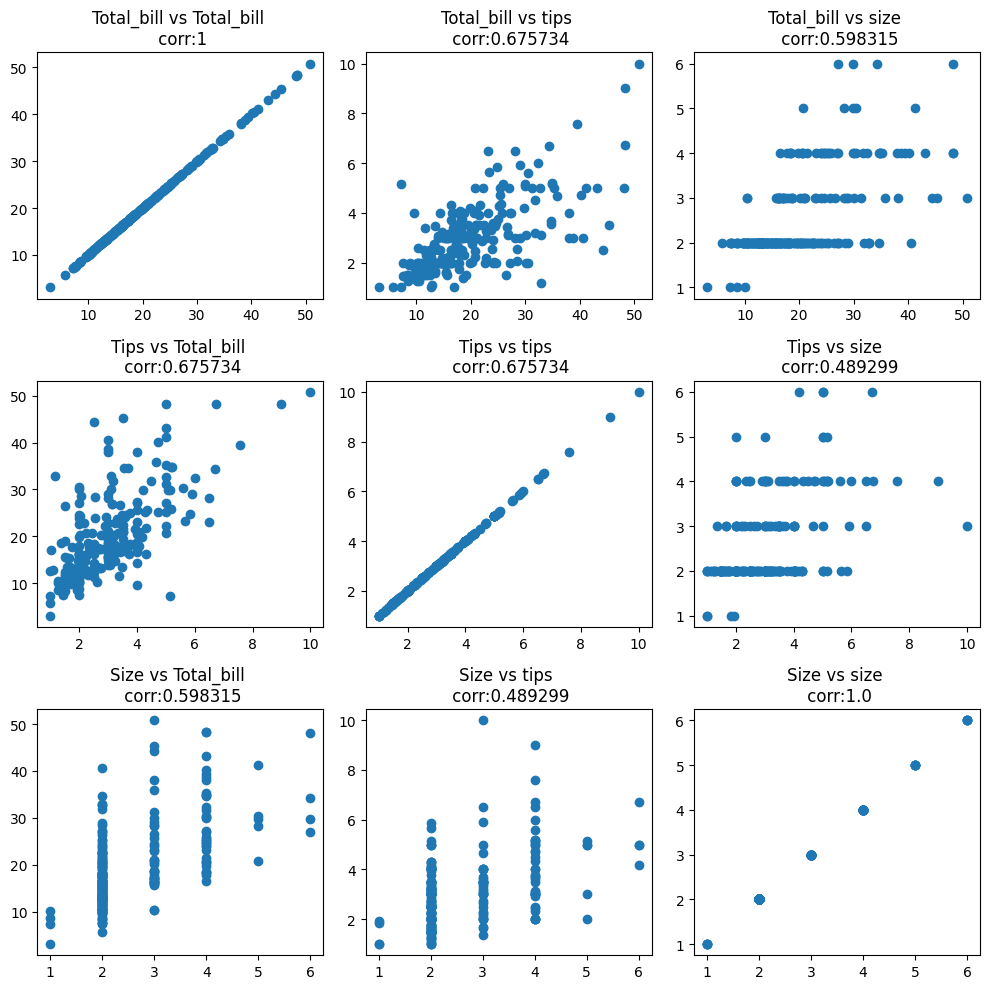

In [34]:

#Show the relationship:
ax,fig = plt.subplots(3,3,figsize=(10,10))

fig[0][0].scatter(numerical_col["total_bill"],numerical_col["total_bill"])
fig[0][0].set_title(f"Total_bill vs Total_bill \n corr:{1}")


fig[0][1].scatter(numerical_col["total_bill"],numerical_col["tip"])
fig[0][1].set_title(f"Total_bill vs tips \n corr:{0.675734}")


fig[0][2].scatter(numerical_col["total_bill"],numerical_col["size"])
fig[0][2].set_title(f"Total_bill vs size \n corr:{0.598315}")



fig[1][0].scatter(numerical_col["tip"],numerical_col["total_bill"])
fig[1][0].set_title(f"Tips vs Total_bill \n corr:{0.675734}")


fig[1][1].scatter(numerical_col["tip"],numerical_col["tip"])
fig[1][1].set_title(f"Tips vs tips \n corr:{0.675734}")


fig[1][2].scatter(numerical_col["tip"],numerical_col["size"])
fig[1][2].set_title(f"Tips vs size \n corr:{0.489299}")


fig[2][0].scatter(numerical_col["size"],numerical_col["total_bill"])
fig[2][0].set_title(f"Size vs Total_bill \n corr:{0.598315}")


fig[2][1].scatter(numerical_col["size"],numerical_col["tip"])
fig[2][1].set_title(f"Size vs tips \n corr:{0.489299}")


fig[2][2].scatter(numerical_col["size"],numerical_col["size"])
fig[2][2].set_title(f"Size vs size \n corr:{1.000000}")



plt.tight_layout()
plt.show()




<br>
<br>

# `#05: frequency, Cumulative frequency:`

<br>
<br>

In [35]:

data = {
    'Category': ['A+', 'B', 'A+', 'C', 'B', 'A+', 'C', 'C', 'B', 'A+','D','D','C','A+']
}

df = pd.DataFrame(data)
freq = df.value_counts()
cum_freq = freq.cumsum()

output = pd.DataFrame({
    "frquency": freq,
    "cumulative_sum": cum_freq
})
output
freq,cum_freq

(Category
 A+          5
 C           4
 B           3
 D           2
 Name: count, dtype: int64,
 Category
 A+           5
 C            9
 B           12
 D           14
 Name: count, dtype: int64)

<br>
<br>

# `#06 Univariate Analysis:`

<br>

**Univariate analysis** is the simplest form of data analysis where you analyze **only one variable at a time**. Its main purpose is to **describe** and **summarize** that variable’s distribution, patterns, and characteristics.

<br>

### 🔹 Key Points:

* Focuses on **a single variable** (no relationship with others).
* Uses measures like:

  * **Frequency**, **percentage**
  * **Mean**, **median**, **mode**
  * **Variance**, **standard deviation**
* visualized with:

  * **Histogram**, **bar chart**, **box plot**, **pie chart**

**Example:**
If you have a dataset of students’ ages, analyzing the average age, age distribution, and variation of ages is **univariate analysis**.


<br>

In [49]:
tinatic = sns.load_dataset("titanic")
tinatic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



### Data Short Description: 

- **survived**: Indicates whether a passenger survived (1) or died (0) in the disaster.
- **pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd), representing socio-economic status.
- **sex**: Gender of the passenger (male or female).
- **age**: Age of the passenger in years (may include missing values).
- **sibsp**: Number of siblings or spouses aboard the Titanic.
- **parch**: Number of parents or children aboard the Titanic.
- **fare**: Amount paid for the ticket (in pounds).
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
- **class**: Another representation of passenger class (1st, 2nd, 3rd).
- **who**: Category of passenger (man, woman, or child).
- **adult_male**: Boolean indicating if the passenger is an adult male (True/False).
- **deck**: Deck on the ship where the cabin was located (e.g., A, B, C, etc., with many missing values).
- **embark_town**: Name of the town where the passenger embarked (e.g., Cherbourg, Queenstown, Southampton).
- **alive**: Whether the passenger is alive (yes/no), alternative to `survived`.
- **alone**: Boolean indicating if the passenger was traveling alone (True/False).


<br>

### Pick up a Numerical Column from our dataset: [Age]

- **Univariate Analysis on Age Column:**

<br>

In [50]:

# age column: univariate analysis:
print(f"count: {tinatic["age"].count()}")
print(f"mean: {tinatic["age"].mean()}")
print(f"std: {tinatic["age"].std()}")
print(f"min: {tinatic["age"].min()}")

print("")
print(f"25%: {np.percentile(tinatic["age"].to_numpy(),25)}")



count: 714
mean: 29.69911764705882
std: 14.526497332334042
min: 0.42

25%: nan



**Why Nan? How a value of 25% will be nan. We have NaN(Not a Number) vlaue in our dataset that's why we got this error.**


In [44]:

# let's check we have nan value of not:
#tinatic["age"].isnull()
tinatic["age"].isnull().sum()

np.int64(177)

In [51]:
print()
print(f"25%: {np.nanpercentile(tinatic["age"].to_numpy(),25)}")
print(f"50%: {np.nanpercentile(tinatic["age"].to_numpy(),50)}")
print(f"75%: {np.nanpercentile(tinatic["age"].to_numpy(),75)}")



25%: 20.125
50%: 28.0
75%: 38.0


In [52]:
# if our data in pandas DataFrame fromat:
print()
print(type(tinatic))
print()
tinatic.describe()


<class 'pandas.core.frame.DataFrame'>



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


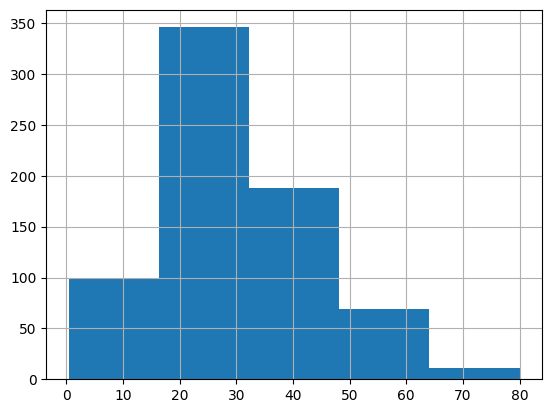

In [59]:

# histrogram:
plt.grid()
plt.hist(tinatic["age"],bins=5)
plt.show()

<Axes: xlabel='age'>

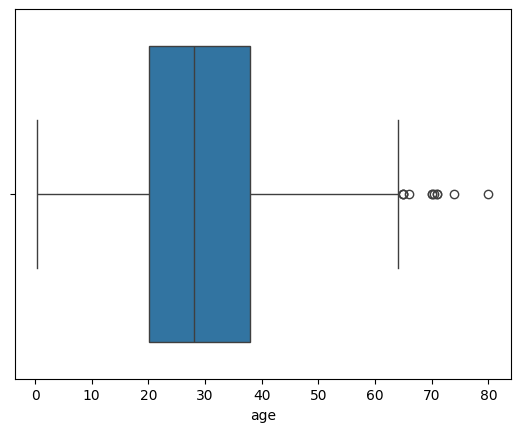

In [ ]:

# check we have outliers or not:
sns.boxplot(tinatic["age"],orient="h")

<br>


- ### If our columns is Categorical then: Let's choose, embarked

<br>

In [73]:
tinatic.describe(include=["object"])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [82]:

#  Bar Chart:
tinatic["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='embark_town'>

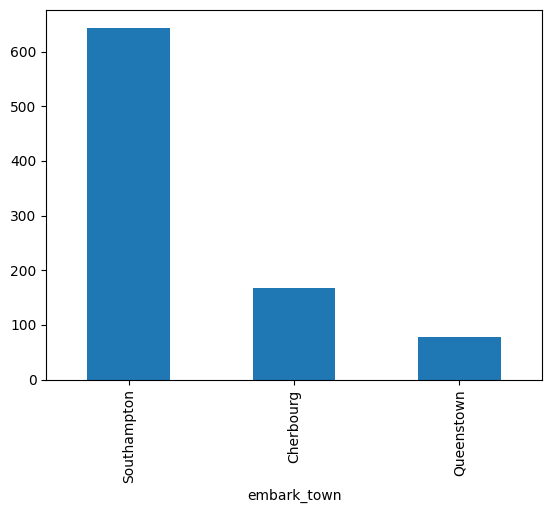

In [83]:

# Bar chart: 
tinatic["embark_town"].value_counts().plot(kind="bar")


<Axes: ylabel='count'>

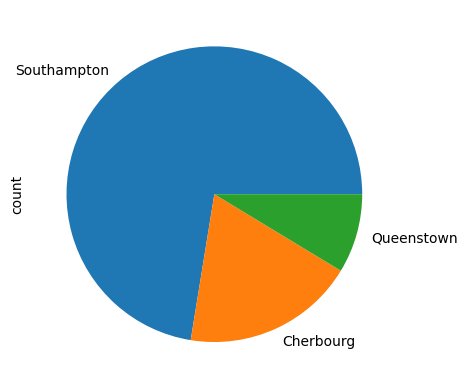

In [84]:

# pi chart:
tinatic["embark_town"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

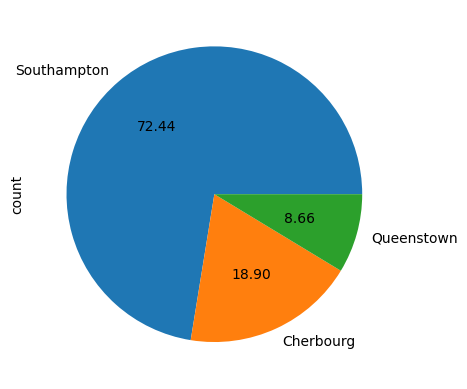

In [85]:
# pi chart:
tinatic["embark_town"].value_counts().plot(kind="pie",autopct="%.2f")